In [64]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/Food_Recipe.csv')

# Basic statistics
print(df.describe())
print(df.info())

       prep_time (in mins)  cook_time (in mins)
count          7289.000000          7289.000000
mean             28.973659            32.171766
std              86.234272            92.673236
min               0.000000             0.000000
25%              10.000000            20.000000
50%              15.000000            30.000000
75%              20.000000            35.000000
max            2880.000000          7200.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7316 non-null   object 
 1   description           7315 non-null   object 
 2   cuisine               7254 non-null   object 
 3   course                7172 non-null   object 
 4   diet                  7178 non-null   object 
 5   ingredients_name      7309 non-null   object 
 6   ingredients_quantity  7309 non-null   object 
 7

In [65]:
print(df.isnull().sum())

name                      0
description               1
cuisine                  62
course                  144
diet                    138
ingredients_name          7
ingredients_quantity      7
prep_time (in mins)      27
cook_time (in mins)      27
instructions              0
image_url                 0
dtype: int64


In [66]:
from langdetect import detect

# Drop rows with missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

# Convert columns to appropriate data types
df_cleaned['prep_time (in mins)'] = df_cleaned['prep_time (in mins)'].astype(int)
df_cleaned['cook_time (in mins)'] = df_cleaned['cook_time (in mins)'].astype(int)

# Remove unnecessary columns
df_cleaned = df_cleaned.drop(['image_url'], axis=1)


# Filter out non-English recipes
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['description'].apply(is_english)]
df = df[df['ingredients_name'].apply(is_english)]
df = df[df['ingredients_quantity'].apply(is_english)]
df = df[df['instructions'].apply(is_english)]

# Print the cleaned dataset
print(df_cleaned)

                                                                               name  \
0     Mint Vegetables Moilee Recipe (Mixed Vegetables Cooked In Minty Coconut Milk)   
1                                Potato And Peas Curry Recipe In Coconut Milk Gravy   
2                            Whole Wheat Chocolate Chip Pancakes With Apples Recipe   
3                           Kollu Pachadi Recipe (Sprouted Horse gram Raita Recipe)   
4                                                                  Recipe Bed Belts   
...                                                                             ...   
7074                                             Eggless Tutti Frutti Cookie Recipe   
7075                                                    Chocolate Chip Scone Recipe   
7076                                                           Kashmiri Roth Recipe   
7077                                                Oatmeal Cranberry Cookie Recipe   
7078                    Choco Swirl Cookies

In [67]:
# Fill missing descriptions with an empty string
#df['description'].fillna('', inplace=True)
df.fillna({'description': ''}, inplace=True)
# Drop rows with missing values in other columns
df.dropna(subset=['cuisine', 'course', 'diet', 'ingredients_name', 'ingredients_quantity', 'prep_time (in mins)', 'cook_time (in mins)'], inplace=True)

# Verify no missing values remain
print(df.isnull().sum())


name                    0
description             0
cuisine                 0
course                  0
diet                    0
ingredients_name        0
ingredients_quantity    0
prep_time (in mins)     0
cook_time (in mins)     0
instructions            0
image_url               0
dtype: int64


In [68]:

# Check the dimensions of the dataset
print("Dataset dimensions:", df.shape)

# Check the data types of each column
print(df.dtypes)


Dataset dimensions: (6443, 11)
name                     object
description              object
cuisine                  object
course                   object
diet                     object
ingredients_name         object
ingredients_quantity     object
prep_time (in mins)     float64
cook_time (in mins)     float64
instructions             object
image_url                object
dtype: object


In [69]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 name                    0
description             0
cuisine                 0
course                  0
diet                    0
ingredients_name        0
ingredients_quantity    0
prep_time (in mins)     0
cook_time (in mins)     0
instructions            0
image_url               0
dtype: int64


In [70]:
# Summary statistics
print("Summary statistics:\n", df.describe())

Summary statistics:
        prep_time (in mins)  cook_time (in mins)
count          6443.000000          6443.000000
mean             29.694707            31.681204
std              86.445679            36.045973
min               0.000000             0.000000
25%              10.000000            20.000000
50%              15.000000            30.000000
75%              20.000000            40.000000
max            2880.000000           900.000000


In [71]:

# Count the number of unique values in each column
print("Unique value counts:\n", df.nunique())

Unique value counts:
 name                    6375
description             6424
cuisine                   78
course                    13
diet                      10
ingredients_name        6409
ingredients_quantity    6423
prep_time (in mins)       86
cook_time (in mins)       66
instructions            6424
image_url               5957
dtype: int64


/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


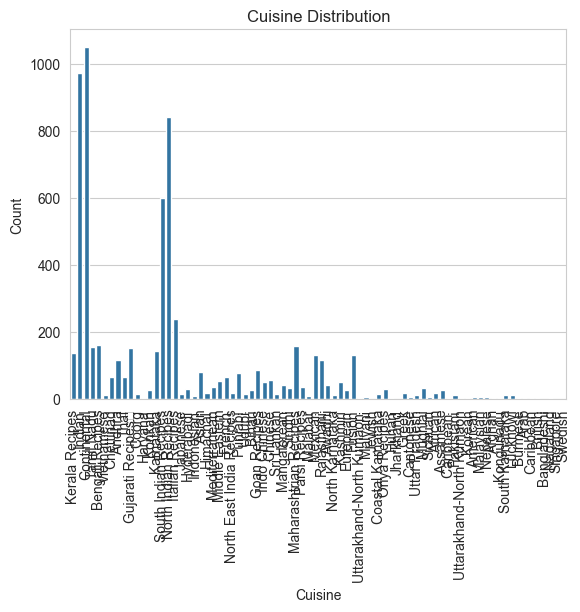

In [72]:
# Visualize the distribution of the target variable
sns.countplot(x='cuisine', data=df)
plt.title('Cuisine Distribution')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_1057/2704948729.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='cuisine', data=df, palette=custom_palette)
/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_1057/2704948729.py:9: UserWarning: 
The palette list has fewer values (6) than needed (78) and will cycle, which may produce an uninterpretable plot.
  plot = sns.countplot(x='cuisine', data=df, palette=custom_palette)
/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_1057/2704948729.py:28: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from 

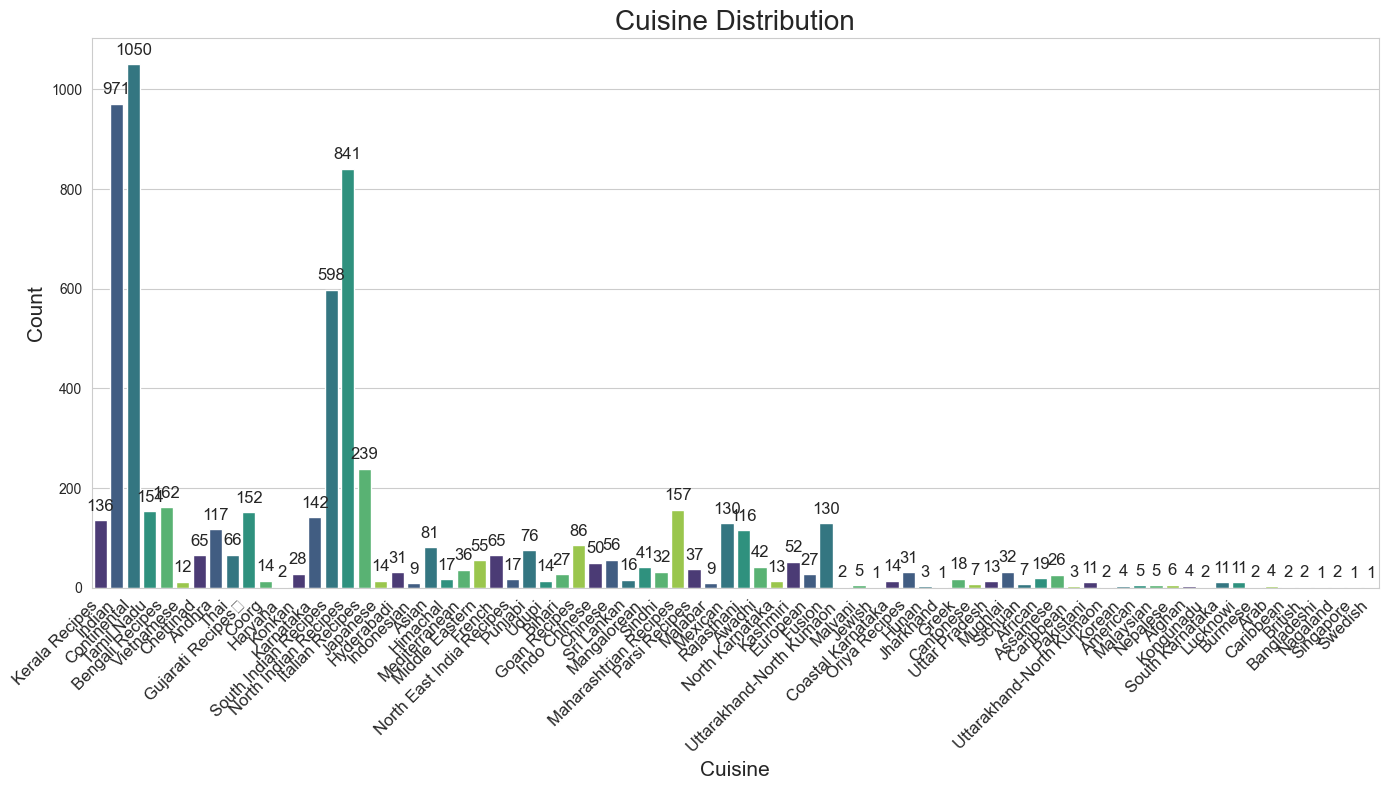

In [73]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(14, 8))

# Create the count plot with a custom color palette
custom_palette = sns.color_palette("viridis")
plot = sns.countplot(x='cuisine', data=df, palette=custom_palette)

# Set title and labels with larger font sizes
plt.title('Cuisine Distribution', fontsize=20)
plt.xlabel('Cuisine', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

for p in plot.patches:
    count = p.get_height()
    plot.annotate(f'{count:.0f}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

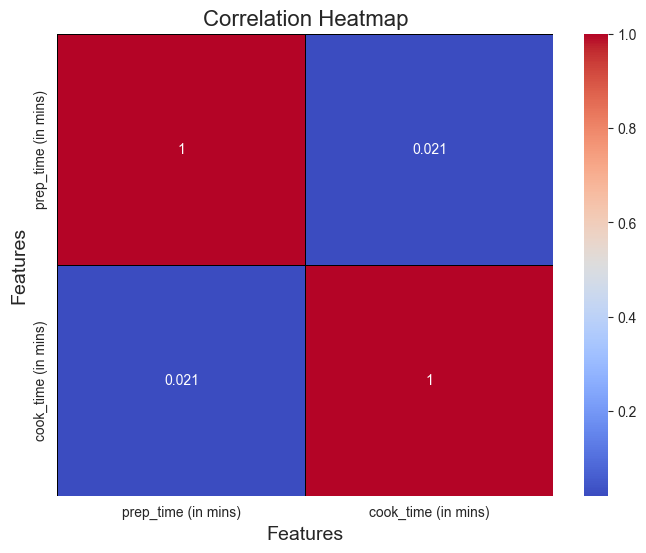

In [74]:
# Select numeric columns
numeric_cols = ['prep_time (in mins)', 'cook_time (in mins)']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(8, 6))

# Create the heatmap with improved readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()


/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


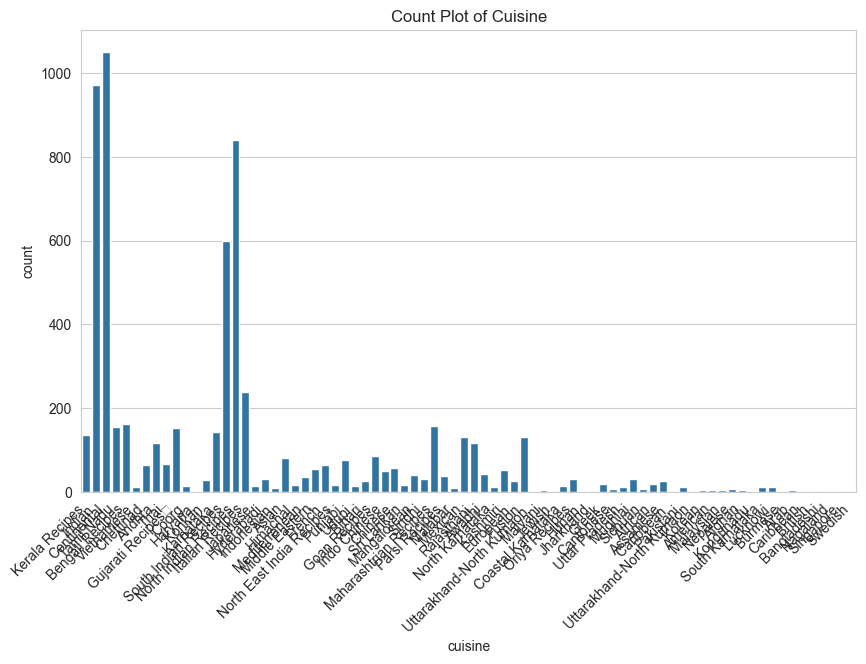

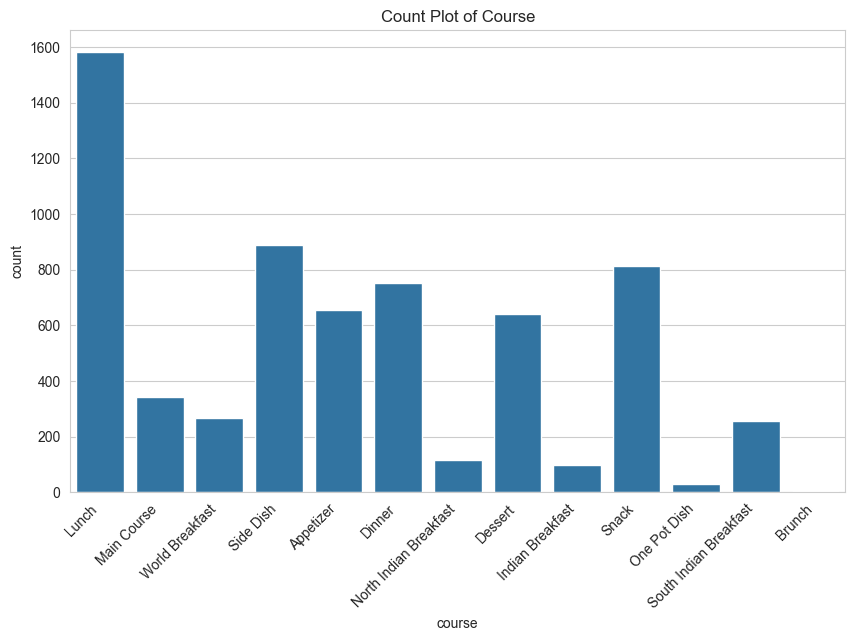

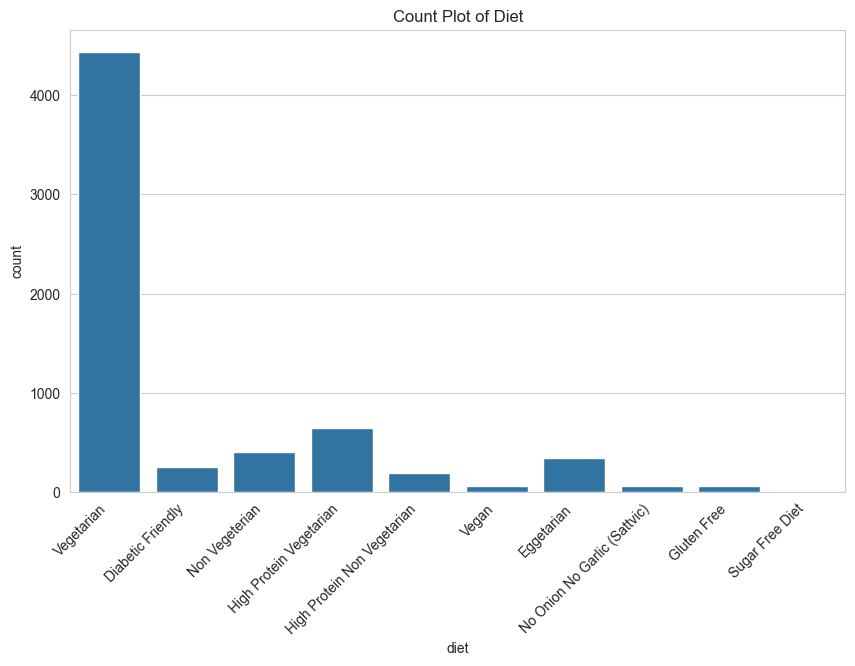

In [75]:
categorical_cols = ['cuisine', 'course', 'diet']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from flask import Flask, request, jsonify


In [77]:
# Data cleaning
df['description'].fillna('', inplace=True)
df.dropna(subset=['cuisine', 'course', 'diet', 'ingredients_name', 'ingredients_quantity', 'prep_time (in mins)', 'cook_time (in mins)'], inplace=True)
df = df.drop_duplicates().reset_index(drop=True)
df['prep_time (in mins)'] = df['prep_time (in mins)'].astype(int)
df['cook_time (in mins)'] = df['cook_time (in mins)'].astype(int)
df = df.drop(['image_url'], axis=1)


/var/folders/d4/cdqb2nds3z920hd3m7jrzhbm0000gn/T/ipykernel_1057/2618853567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [78]:
# Feature engineering
df['ingredient_count'] = df['ingredients_name'].apply(lambda x: len(x.split(',')))
df['prep_time_category'] = pd.cut(df['prep_time (in mins)'], bins=[0, 10, 20, 30, 1000], labels=['short', 'medium', 'long', 'very long'])

In [79]:
# Verification of feature engineering
print(df.head())
print(df[['ingredient_count', 'prep_time_category']].describe())


                                                                            name  \
0  Mint Vegetables Moilee Recipe (Mixed Vegetables Cooked In Minty Coconut Milk)   
1                             Potato And Peas Curry Recipe In Coconut Milk Gravy   
2                         Whole Wheat Chocolate Chip Pancakes With Apples Recipe   
3                        Kollu Pachadi Recipe (Sprouted Horse gram Raita Recipe)   
4                                                               Recipe Bed Belts   

                                                                                                                                                                                                                                                                                                                                                                                                                 description  \
0                                                                              

In [80]:
# Vectorize ingredients
#TF-IDF Vectorization: Converts the 'ingredients_name' column into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency). 
# This is a common method for converting text data into numerical data that can be used by machine learning models.
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','))
X = vectorizer.fit_transform(df['ingredients_name'])

/Users/keerthireddy/Documents/GitHub/RecipeRecommendationSystem/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [81]:
# Model building
knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)

In [82]:
# Define a recommendation function
def recommend_recipes(input_ingredients, model, vectorizer, data):
    input_vector = vectorizer.transform([input_ingredients])
    distances, indices = model.kneighbors(input_vector)
    recommendations = data.iloc[indices[0]]

    # Format the recommendations as a list of dictionaries
    formatted_recommendations = recommendations.to_dict(orient='records')
    return formatted_recommendations


In [83]:
# Example input
input_ingredients = 'rice, groundnuts, coconut'
recommendations = recommend_recipes(input_ingredients, knn, vectorizer, df)


In [84]:
# Display the recommendations in a tabular format
pd.set_option('display.max_colwidth', None)  # Disable truncation of column content
recommendations_df = pd.DataFrame(recommendations)
recommendations_df

,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,ingredient_count,prep_time_category
0,Kerala Style Appam Recipe,"Appam is a famous dish of Kerala which is made in every household. Appam is served with coconut milk or stew, but you can serve it with any South Indian curry of your choice. It has a thick middle part and thin corners.",Kerala Recipes,Main Course,Vegetarian,"Rice, Rice, Coconut, Active Dry Yeast, Sugar, Salt","2 cups rice, soaked for 3 hours 1 cup rice, cooked 1 cup coconut, grated 1 tsp active dry yeast, + 1/2 cup lukewarm water 2 tbsp sugar Salt, according to taste",200,30,"To make Kerala style appam recipe, first soak the rice in water for 3 to 4 hours. Now add salt, sugar, active dry yeast in a bowl and mix. Keep aside for 5 minutes. Now add soaked rice, cooked rice, coconut, some water, salt in a mixer grinder and grind to make a batter. Add yeast mixture to it and mix. Take out this mixture in a bowl, cover it and keep it aside to ferment for 5 to 6 hours. Now add water as per requirement and dilute the batter as per your requirement. Be careful not to dilute it too much. Now place an appam pan on the gas on medium flame. Now pour the appam batter in this pan and take the pan in your hand and rotate it all around so that the batter spreads well. Appam will be thick in the middle and thin at the corners. Cover the pan for 2 minutes until it becomes light golden brown at the corners. Remove and serve. Serve Kerala Style Appam Recipe with Kadala Curry or Vegetable Stew for your daily lunch.",6,very long
1,Goan Shepeche Polle Recipe,"The Goan Shepeche Polle Recipe is a traditional recipe from goa, that is very similar to a dosa but flavored with dill leaves, jaggery and coconut. Dill leaves have medicinal properties and are known to boost the immune system and protect against bone-degradation as it is a rich source of calcium. Shepeche Polle Recipe is my personal favorite and I have been making these since many years. It has a strong, tangy taste from the Dill leaves and sweetness of jaggery and coconut.",Goan Recipes,South Indian Breakfast,Vegetarian,"Rice, Black Urad Dal (Whole), Dill leaves, Coconut, Jaggery, Salt, Ghee","1 cup Rice 1/4 cup Black Urad Dal (Whole) 1 cup Dill leaves , chopped 1/2 cup Coconut , grated 1/2 cup Jaggery , grated Salt , to taste Ghee , for cooking the pancakes",240,30,"To begin making the Goan Shepeche Polle Recipe, soak rice and urad dal in water for 4 to 5 hours. Once soaked drain the water. Grind the rice and dal mixture adding little water at a time to make a smooth thick dosa batter. Pour the batter into a large bowl, cover and allow it to rest and ferment for about 6 to 8 hours. After the fermentation process, keep the batter aside and we will proceed to make the dill paste.Grind together dill leaves, grated jaggery and grated coconut by adding little water to make a paste.Stir in the dill coconut and jaggery mixture to the dosa/ pancake batter and stir well. Add salt to taste and stir again.The next step is to make the pancake/ dosa (Shepeche Polle).Preheat a skillet on medium heat and grease the skillet. Pour a ladleful of batter on the skillet and spread the batter in circular motion until it is thin. Drizzle ghee over the Shepeche Polle and allow it to cook and browned.Once cooked, remove from the pan and serve. Proceed the same way with the remaining batter. Serve the Goan Shepeche Polle Recipe along with a Tomato Onion Chutney for breakfast.",7,very long
2,Steamed Rice Recipe - Pressure Cooker & Sauce Pan Methods,"Rice can be cooked in a variety of ways. Personally I find the pressure cooker method quick and effective, that can produce rice grains of different textures - from soft to grainy. There are a number of different types of rice grains available and you might choose the variety that your family has been eating for generations or you might want to try another new variety.",Indian,Main 

In [85]:
# Increase the size of columns
pd.set_option('display.max_colwidth', None)  # Disable truncation of column content
pd.set_option('display.max_columns', None)  # Display all columns

# Apply styling to the DataFrame
styled_df = pd.DataFrame(recommendations).style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '12pt')]
}, {
    'selector': 'td',
    'props': [('font-size', '10pt')]
}])

# Display without index using HTML
from IPython.display import display, HTML

# Convert styled DataFrame to HTML
html = styled_df.to_html()

# Remove index from HTML
html = html.replace('<th></th>', '')
html = html.replace('<td class="data row0 col0" >', '<td class="data row0 col0" style="display: none;">')
html = html.replace('<td class="data row1 col0" >', '<td class="data row1 col0" style="display: none;">')
html = html.replace('<td class="data row2 col0" >', '<td class="data row2 col0" style="display: none;">')
html = html.replace('<td class="data row3 col0" >', '<td class="data row3 col0" style="display: none;">')
html = html.replace('<td class="data row4 col0" >', '<td class="data row4 col0" style="display: none;">')

display(HTML(html))

,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,ingredient_count,prep_time_category
0,Kerala Style Appam Recipe,"Appam is a famous dish of Kerala which is made in every household. Appam is served with coconut milk or stew, but you can serve it with any South Indian curry of your choice. It has a thick middle part and thin corners.",Kerala Recipes,Main Course,Vegetarian,"Rice, Rice, Coconut, Active Dry Yeast, Sugar, Salt","2 cups rice, soaked for 3 hours 1 cup rice, cooked 1 cup coconut, grated 1 tsp active dry yeast, + 1/2 cup lukewarm water 2 tbsp sugar Salt, according to taste",200,30,"To make Kerala style appam recipe, first soak the rice in water for 3 to 4 hours. Now add salt, sugar, active dry yeast in a bowl and mix. Keep aside for 5 minutes. Now add soaked rice, cooked rice, coconut, some water, salt in a mixer grinder and grind to make a batter. Add yeast mixture to it and mix. Take out this mixture in a bowl, cover it and keep it aside to ferment for 5 to 6 hours. Now add water as per requirement and dilute the batter as per your requirement. Be careful not to dilute it too much. Now place an appam pan on the gas on medium flame. Now pour the appam batter in this pan and take the pan in your hand and rotate it all around so that the batter spreads well. Appam will be thick in the middle and thin at the corners. Cover the pan for 2 minutes until it becomes light golden brown at the corners. Remove and serve. Serve Kerala Style Appam Recipe with Kadala Curry or Vegetable Stew for your daily lunch.",6,very long
1,Goan Shepeche Polle Recipe,"The Goan Shepeche Polle Recipe is a traditional recipe from goa, that is very similar to a dosa but flavored with dill leaves, jaggery and coconut. Dill leaves have medicinal properties and are known to boost the immune system and protect against bone-degradation as it is a rich source of calcium. Shepeche Polle Recipe is my personal favorite and I have been making these since many years. It has a strong, tangy taste from the Dill leaves and sweetness of jaggery and coconut.",Goan Recipes,South Indian Breakfast,Vegetarian,"Rice, Black Urad Dal (Whole), Dill leaves, Coconut, Jaggery, Salt, Ghee","1 cup Rice 1/4 cup Black Urad Dal (Whole) 1 cup Dill leaves , chopped 1/2 cup Coconut , grated 1/2 cup Jaggery , grated Salt , to taste Ghee , for cooking the pancakes",240,30,"To begin making the Goan Shepeche Polle Recipe, soak rice and urad dal in water for 4 to 5 hours. Once soaked drain the water. Grind the rice and dal mixture adding little water at a time to make a smooth thick dosa batter. Pour the batter into a large bowl, cover and allow it to rest and ferment for about 6 to 8 hours. After the fermentation process, keep the batter aside and we will proceed to make the dill paste.Grind together dill leaves, grated jaggery and grated coconut by adding little water to make a paste.Stir in the dill coconut and jaggery mixture to the dosa/ pancake batter and stir well. Add salt to taste and stir again.The next step is to make the pancake/ dosa (Shepeche Polle).Preheat a skillet on medium heat and grease the skillet. Pour a ladleful of batter on the skillet and spread the batter in circular motion until it is thin. Drizzle ghee over the Shepeche Polle and allow it to cook and browned.Once cooked, remove from the pan and serve. Proceed the same way with the remaining batter. Serve the Goan Shepeche Polle Recipe along with a Tomato Onion Chutney for breakfast.",7,very long
2,Steamed Rice Recipe - Pressure Cooker & Sauce Pan Methods,"Rice can be cooked in a variety of ways. Personally I find the pressure cooker method quick and effective, that can produce rice grains of different textures - from soft to grainy. There are a number of different types of rice grains available and you might choose the variety that your family has been eating for generations or you might want to try another new variety.",Indian,Main 

Recommendation with diet vegan or vegetarian or non vegetarian

In [88]:
def recommend_recipes_withdiet(input_ingredients, diet_preference, model, vectorizer, data):
    # Filter the data based on diet preference
    filtered_data = data[data['diet'].str.contains(diet_preference, case=False, na=False)]

    if filtered_data.empty:
        return []

    # Vectorize the ingredients for the filtered data
    filtered_vector = vectorizer.transform(filtered_data['ingredients_name'])

    # Vectorize the input ingredients
    input_vector = vectorizer.transform([input_ingredients])

    # Fit the model on the filtered vector
    model.fit(filtered_vector)
    
    # Find the nearest neighbors within the filtered data
    distances, indices = model.kneighbors(input_vector)
    
    # Use the filtered data to get recommendations
    recommendations = filtered_data.iloc[indices[0]].reset_index(drop=True)
    
    # Format the recommendations as a list of dictionaries
    formatted_recommendations = recommendations.to_dict(orient='records')
    return formatted_recommendations


In [94]:
from IPython.display import display, HTML


# Example input
input_ingredients = 'mushrooms, cheese, basil'
diet_preference = 'Non Vegetarian'  # Options: 'Vegan', 'Vegetarian', 'Non Vegetarian'

recommendations = recommend_recipes_withdiet(input_ingredients, diet_preference, knn, vectorizer, df)

if recommendations:
    # Increase the size of columns
    pd.set_option('display.max_colwidth', None)  # Disable truncation of column content
    pd.set_option('display.max_columns', None)  # Display all columns

    # Apply styling to the DataFrame
    styled_df = pd.DataFrame(recommendations).style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap',
    }).set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '12pt')]
    }, {
        'selector': 'td',
        'props': [('font-size', '10pt')]
    }])

    # Display without index using HTML
    html = styled_df.to_html()

    # Remove index from HTML
    html = html.replace('<th></th>', '')
    html = html.replace('<td class="data row0 col0" >', '<td class="data row0 col0" style="display: none;">')
    html = html.replace('<td class="data row1 col0" >', '<td class="data row1 col0" style="display: none;">')
    html = html.replace('<td class="data row2 col0" >', '<td class="data row2 col0" style="display: none;">')
    html = html.replace('<td class="data row3 col0" >', '<td class="data row3 col0" style="display: none;">')
    html = html.replace('<td class="data row4 col0" >', '<td class="data row4 col0" style="display: none;">')

    display(HTML(html))
else:
    print("No matching recipes found.")


,name,description,cuisine,course,diet,ingredients_name,ingredients_quantity,prep_time (in mins),cook_time (in mins),instructions,ingredient_count,prep_time_category
0,Mushroom Masala Cheese Omelette Recipe,"Mushroom Masala Cheese Omelette Recipe is a wholesome and high protein omelette that is packed with taste from mushrooms, green chillies and coriander. The addition of cheese adds to the creaminess and fluffiness.",Continental,Indian Breakfast,High Protein Non Vegetarian,"Whole Eggs, Button mushrooms, Onion, Green Chilli, Tomato, Black olives, Cheese, Coriander (Dhania) Leaves, Salt and Pepper, Oil","2 Whole Eggs 10 Button mushrooms , roughly chopped 1/2 Onion , finely chopped 1 Green Chilli , finely chopped 1/2 Tomato , finely chopped 4 Black olives , finely chopped 1 tablespoon Cheese , grated Coriander (Dhania) Leaves , a small bunch chopped Salt and Pepper , to taste 1 teaspoon Oil , for cooking",10,10,"To begin making Mushroom Masala Omelette Recipe, first prep all the ingredients and keep them ready.In a mixing bowl, break the eggs and whisk them up well along with salt, pepper, olives, cheese and tomatoes. Keep this aside.Heat oil in an omelette pan over medium heat; add the mushrooms, onions and green chillies and saute until the onions and mushrooms are slightly roasted. Once roasted, add the egg omelette cheese mixture into the roasted onion and mushrooms.Swirl the pan to spread the omelette mixture and gently combine the onions and mushrooms and spread it around.Keep the heat on low and cook the omelette until you notice the top is getting steamed and cooked. You can also optionally cover the pan and cook the omelette faster.Once the top is cooked, fold the omelette into half and cook for another few minutes is required and turn off the heat. You can also optionally flip the omelette and cook it on both sides.Serve the Mushroom Masala Omelette along with a Toast, fruits and a cup of Masala Chai or Filter Coffee.",10,short
1,Shredded Chicken Cheese Sandwich Recipe,"Cheesy melt in mouth Shredded Chicken Sandwich is perfect for your relaxed Sunday breakfast. Easy to make with no much effort & the end result is so fulfilling. The cheesy chicken stuffed in the sandwich is delicious and can also be made for your tea time snacks. You can also make it for your kids birthday party, as the kids love cheese and this sandwich has everything that kids want.",Continental,World Breakfast,High Protein Non Vegetarian,"Chicken breasts, Basil leaves, Homemade Pizza And Pasta Sauce, Italian seasoning, Garlic, Black pepper powder, Mozzarella cheese, Cheese, Butter (Salted), Extra Virgin Olive Oil","1 Chicken breasts 4 Basil leaves 2 Tablespoon Homemade Pizza And Pasta Sauce 1 teaspoon Italian seasoning 4 cloves Garlic 1/2 teaspoon Black pepper powder 1/2 Cup Mozzarella cheese , grated 1/2 Cup Cheese , grated 2 tablespoon Butter (Salted) , melted 1 tablespoon Extra Virgin Olive Oil",20,10,"To begin making the Shredded Chicken Cheese Sandwich recipe, we will start by boiling the boiling chicken breastIn a saucepan, boil water on medium flame, add the chicken pieces until it becomes tender. Once it is ready & cooked, drain out the water and let it cool down.Then shred the chicken using a knife. Set aside.Next heat up some olive oil in a heavy bottom pan on medium flame and add chopped garlic into it. Saute it for a couple of minutes then add tomato pasta sauce into the pan.Now add chopped basil leaves, Italian seasoning & black pepper into the pan and give it a good stir.At this stage add the shredded chicken pieces into the pan and let it cook for a couple of minutes. Next, add 1 tablespoon of both the cheese and cook for another 2 minutes.Turn off the heat.Now apply melted butter on the outer sides of sandwich bread and then stuff it with chicken. Add both of the cheeses on the top. Put another bread on top to finish the sandwich.Pop the sandwich into the preheated oven at 150 C for 8-10 minutes.Once done, slice it into two halves & e